<a href="https://colab.research.google.com/github/fatima448/brain_tumor_detection/blob/main/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Classification


## Overview
This project trains a deep learning model to classify brain MRI images for tumor detection.

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import zipfile
zip_path = "/content/drive/MyDrive/Brain Tumour Detection.v1i.folder.zip"   # CHANGE THIS
extract_dir = "/content/brain_tumor"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_dir)

print("Extracted to:", extract_dir)


Extracted to: /content/brain_tumor


In [6]:
import os
print(os.listdir("/content/brain_tumor"))


['valid', 'train', 'README.dataset.txt', 'test', 'README.roboflow.txt']


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH = 32

train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)
test_gen  = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    "/content/brain_tumor/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode="categorical"
)

valid_data = valid_gen.flow_from_directory(
    "/content/brain_tumor/valid",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode="categorical"
)

test_data = test_gen.flow_from_directory(
    "/content/brain_tumor/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode="categorical",
    shuffle=False
)


Found 3858 images belonging to 4 classes.
Found 1099 images belonging to 4 classes.
Found 548 images belonging to 4 classes.


In [8]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential

base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base.trainable = False

model = Sequential([
    base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 233s 2s/step - accuracy: 0.7214 - loss: 0.7123 - val_accuracy: 0.8908 - val_loss: 0.3090
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9035 - loss: 0.2869 - val_accuracy: 0.8917 - val_loss: 0.2784
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.9089 - loss: 0.2592 - val_accuracy: 0.8899 - val_loss: 0.2741
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9310 - loss: 0.1875 - val_accuracy: 0.9190 - val_loss: 0.2071
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.9460 - loss: 0.1627 - val_accuracy: 0.9199 - val_loss: 0.1838
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.9540 - loss: 0.1368 - val_accuracy: 0.9336 - val_loss: 0.1806
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9568 - loss: 0.1240 - val_accuracy: 0.9208 - val_loss: 0.1901
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9626 - loss: 0.1043 - val_accu

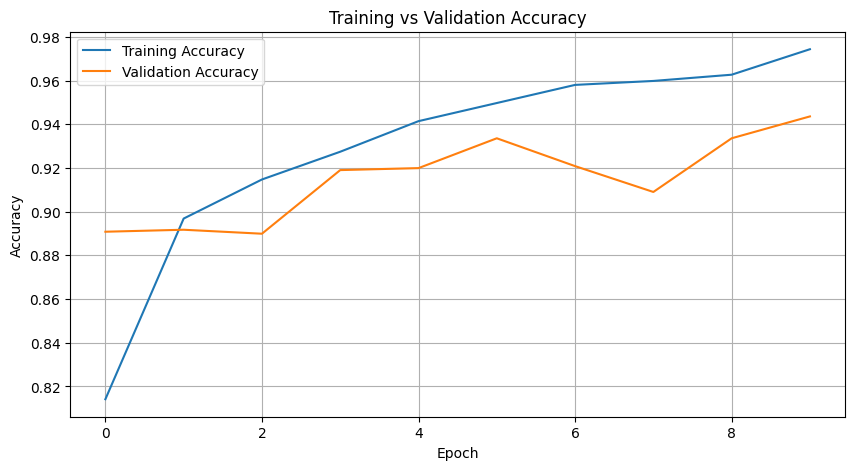

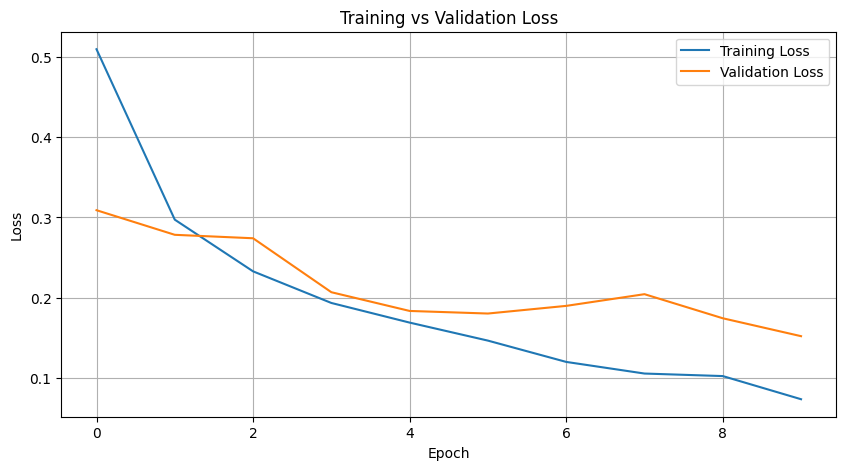

In [10]:
import matplotlib.pyplot as plt

# Accuracy Graph
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Graph
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc * 100)


18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8939 - loss: 0.3347
Test Accuracy: 92.51824617385864


In [12]:
model.save("/content/drive/MyDrive/brain_tumor_model.keras")

In [13]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow import keras

# Load the saved model from Drive
model = keras.models.load_model("/content/drive/MyDrive/brain_tumor_model.keras")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import gradio as gr
import cv2
import numpy as np
import tensorflow as tf

# Load Model
model = tf.keras.models.load_model("/content/drive/MyDrive/brain_tumor_model.keras")

IMG_SIZE = 224
CLASS_NAMES = ["glioma", "meningioma", "notumor", "pituitary"]

def predict_tumor(img):
    original = img.copy()

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)[0]
    class_id = np.argmax(pred)
    confidence = float(np.max(pred))

    # Build a nice formatted result
    # COLORS: red = danger, green = safe
    if CLASS_NAMES[class_id] == "notumor":
        status = "🟢 **No Tumor Detected**"
    else:
        status = f"🔴 **Tumor Detected: {CLASS_NAMES[class_id].upper()}**"

    result = f"""
### 🧠 Diagnosis Report
{status}

**Confidence:** {round(confidence * 100, 2)}%

---

### 📌 Details
- **Predicted Class:** {CLASS_NAMES[class_id]}
- **Model:** MobileNetV2 (Fine-Tuned)
"""

    return original, result


# UI
with gr.Blocks(css="""
#result-box {border: 2px solid #4A90E2; padding: 15px; border-radius: 10px;}
#title {text-align:center; font-size: 36px; font-weight: bold;}
""") as demo:

    gr.Markdown("<div id='title'>🧠 Brain Tumor Detection System</div>")
    gr.Markdown("Upload an MRI scan to analyze tumor presence and type.")

    with gr.Row():
        inp = gr.Image(type="numpy", label="Upload MRI Scan", height=350)

        with gr.Column():
            output_img = gr.Image(label="Original Image", height=350)
            output_text = gr.Markdown(label="Diagnosis", elem_id="result-box")

    submit_btn = gr.Button("Analyze Image", variant="primary")

    submit_btn.click(predict_tumor, inputs=inp, outputs=[output_img, output_text])


demo.launch()


/tmp/ipython-input-465099609.py:47: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(css="""


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c0f18c31d1b94c1e16.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
